In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier

In [57]:
df = pd.read_csv("/Users/starburned/data_analytics_projects/data/water_quality.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
len(df)

3276

In [5]:
df.isna().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [6]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

## EDA

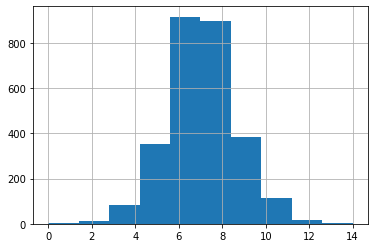

In [9]:
df['ph'].hist();

pH values are normally distributed

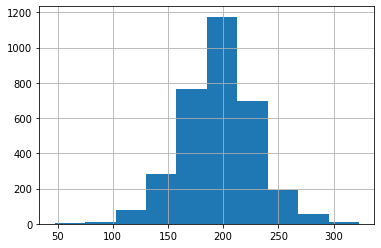

In [12]:
df['ph'].hist();

Hardness is also distributed normally, a little bit skewed to the right

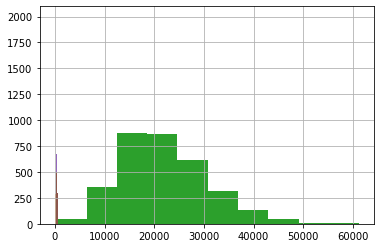

In [27]:
#for col in df:
    #df[col].hist()       

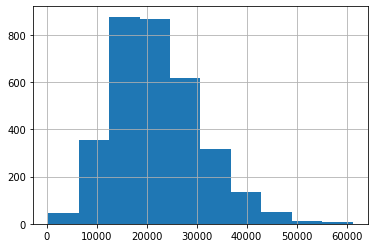

In [29]:
df['Solids'].hist();

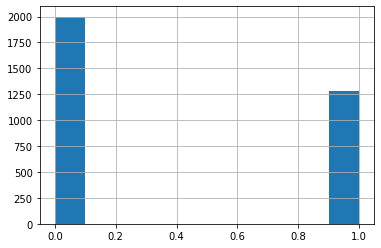

In [31]:
df['Potability'].hist();

In [33]:
# Target variable
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

## Analytics

In [50]:
# Starting with simple correlation
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


No obvious correlation between water parameters and potability

In [58]:
df['ph_bin'] = pd.qcut(df['ph'], 5)

In [59]:
df['ph_bin'].value_counts()

(-0.001, 5.822]    557
(5.822, 6.702]     557
(6.702, 7.437]     557
(7.437, 8.311]     557
(8.311, 14.0]      557
Name: ph_bin, dtype: int64

In [60]:
df.groupby('ph_bin')['Potability'].mean()

ph_bin
(-0.001, 5.822]    0.355476
(5.822, 6.702]     0.398564
(6.702, 7.437]     0.456014
(7.437, 8.311]     0.432675
(8.311, 14.0]      0.333932
Name: Potability, dtype: float64

In [61]:
df['Hardness_bin'] = pd.qcut(df['Hardness'], 5)

In [62]:
df.groupby('Hardness_bin')['Potability'].mean()

Hardness_bin
(47.431000000000004, 169.944]    0.440549
(169.944, 189.261]               0.377099
(189.261, 204.124]               0.334351
(204.124, 222.269]               0.383206
(222.269, 323.124]               0.415267
Name: Potability, dtype: float64

## Dealing with missing data

In [35]:
df.isna().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [34]:
missing_values = SimpleImputer(missing_values=np.nan, strategy='mean')

In [36]:
missing_values.fit(df[['ph', 'Sulfate', 'Trihalomethanes']])

SimpleImputer()

In [37]:
df[['ph', 'Sulfate', 'Trihalomethanes']]= missing_values.transform(df[['ph', 'Sulfate', 'Trihalomethanes']])

In [38]:
df.isna().mean()

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

## Machine Learning

In [39]:
train = df.sample(frac=0.7,random_state=42).copy()

In [40]:
val = df[~df.index.isin(train.index)].copy()

In [41]:
len(train)

2293

In [43]:
len(val)

983

In [44]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [45]:
X_col = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [46]:
y_col = ['Potability']

In [64]:
model = CatBoostClassifier(learning_rate=0.005,
                           eval_metric='AUC',verbose=100)

In [65]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.5754005	best: 0.5754005 (0)	total: 60.4ms	remaining: 1m
100:	test: 0.6985190	best: 0.6990990 (48)	total: 223ms	remaining: 1.98s
200:	test: 0.6987874	best: 0.6998217 (178)	total: 395ms	remaining: 1.57s
300:	test: 0.6986316	best: 0.7002155 (211)	total: 580ms	remaining: 1.34s
400:	test: 0.7016740	best: 0.7017865 (398)	total: 745ms	remaining: 1.11s
500:	test: 0.7027646	best: 0.7032363 (494)	total: 903ms	remaining: 900ms
600:	test: 0.7022236	best: 0.7035609 (537)	total: 1.06s	remaining: 706ms
700:	test: 0.7025222	best: 0.7035609 (537)	total: 1.22s	remaining: 520ms
800:	test: 0.7025049	best: 0.7035609 (537)	total: 1.38s	remaining: 343ms
900:	test: 0.7025871	best: 0.7035609 (537)	total: 1.54s	remaining: 169ms
999:	test: 0.7032796	best: 0.7035609 (537)	total: 1.71s	remaining: 0us

bestTest = 0.7035608874
bestIteration = 537

Shrink model to first 538 iterations.


In [66]:
fi = pd.DataFrame({'feature':X_col,'fi':model.feature_importances_})

In [67]:
fi.sort_values('fi',ascending=False)

,feature,fi
0,ph,23.723408
4,Sulfate,21.705975
3,Chloramines,12.491764
2,Solids,12.103160
1,Hardness,10.876873
5,Conductivity,5.309513
6,Organic_carbon,4.889835
8,Turbidity,4.501763
7,Trihalomethanes,4.397708


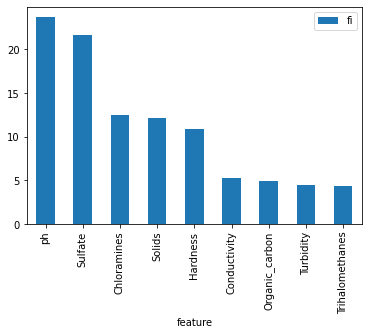

In [68]:
fi.sort_values('fi',ascending=False).set_index('feature').plot(kind='bar');